In [44]:
import pandas as pd
import numpy as np

In [67]:
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv("da_sys_lambda.csv")

In [46]:
data.head()

,Unnamed: 0,DeliveryDate,HourEnding,SystemLambda,DSTFlag
0,0,02/26/2020,1:00,4.1865,N
1,1,02/26/2020,23:00,23.0128,N
2,2,02/26/2020,22:00,35.1015,N
3,3,02/26/2020,21:00,47.9140,N
4,4,02/26/2020,20:00,48.3833,N


In [47]:
pd_lmp = pd.read_csv("da_lmp.csv")
pd_lmp.head()

,Unnamed: 0,DeliveryDate,HourEnding,BusName,LMP,DSTFlag
0,0,03/10/2020,01:00,CADICKS_804V,13.61,N
1,1,03/10/2020,01:00,ADICKS__138B,13.61,N
2,2,03/10/2020,01:00,ADICKS__8030,13.61,N
3,3,03/10/2020,01:00,ADK_V_C,13.61,N
4,4,03/10/2020,01:00,CADICKS_804O,13.61,N


In [48]:
pd_shadow = pd.read_csv("da_shadow_18_20.csv")
pd_shadow.head()

/Users/masoud.mirmomeni/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,OPR_DATE,OPR_HOUR,CONSTRAINT_ID,CONSTRAINT_NAME,CONTINGENCY_NAME,CONSTRAINT_LIMIT,CONSTRAINT_VALUE,VOILATION_AMOUNT,SHADOW_PRICE,FROM_STATION,TO_STATION,FROM_STATION_KV,TO_STATION_KV,DELIVERY_TIME,DATE_INSERTED,DATE_UPDATED,DST_FLAG
0,0,0,2016-10-13 00:00:00,24,587,DIL_COTU_1,SJARDIL8,40,40,0,12.96,DILLEYSW,COTULAS,69.0,69.0,2016-10-14 23:00:00,2016-10-13 11:25:47,NaN,N
1,1,1,2016-10-13 00:00:00,24,588,SILASRAY_T1,SSIXSIL8,67,67,0,0.15,SILASRAY,SILASRAY,138.0,69.0,2016-10-14 23:00:00,2016-10-13 11:25:47,NaN,N
2,2,2,2016-10-13 00:00:00,24,589,6485__A,SECTPBS8,162,162,0,20.16,MOSSW,PBSES,138.0,138.0,2016-10-14 23:00:00,2016-10-13 11:25:47,NaN,N
3,3,3,2016-10-13 00:00:00,24,590,450__A,SSNDAU15,1072,1072,0,1.15,SNDSW,AUSTRO,345.0,345.0,2016-10-14 23:00:00,2016-10-13 11:25:47,NaN,N
4,4,4,2016-10-13 00:00:00,24,591,211T147_1,DAUSSND5,478,478,0,2.74,GILLCR,MCNEIL_,138.0,138.0,2016-10-14 23:00:00,2016-10-13 11:25:47,NaN,N


In [49]:
pd_shadow['CONTINGENCY_NAME'].value_counts()

BASE CASE    139880
SCOLBAL8      39871
SFORYEL8      19653
SEAGES28      18125
DVICV_D8      17776
              ...  
SABNABM8          1
SWEBAUS8          1
DMP_HG28          1
SSWCLNC5          1
SCTTAL25          1
Name: CONTINGENCY_NAME, Length: 2183, dtype: int64

In [50]:
pd_shadow['CONSTRAINT_NAME'].value_counts()

LENSW_PUTN2_1       29332
EAGLEP_ESCOND1_1    18231
HAMILT_MAVERI1_1    16021
HUMBLT_NOVICT1_1    14927
PNHNDL              14862
                    ...  
ORNT_REDCRE1_1          1
LANCTYR1_1              1
161T213_1               1
DERSL_85_A              1
497T497_1               1
Name: CONSTRAINT_NAME, Length: 1820, dtype: int64

In [51]:
pd_shadow['CONSTRAINT_NAME'].iloc[0]

'DIL_COTU_1'

In [52]:
pd_shadow['CONTINGENCY_NAME'].iloc[0]

'SJARDIL8'

In [53]:
pd_shadow.groupby(['CONTINGENCY_NAME', 'CONSTRAINT_NAME']).count()

Unnamed: 0  Unnamed: 0.1  OPR_DATE  \
CONTINGENCY_NAME CONSTRAINT_NAME                                        
BASE CASE        100027_D_1               492           492       492   
                 112T400_1                  5             5         5   
                 12_WCL_WCS_1             148           148       148   
                 1560__E                    4             4         4   
                 15__A                      7             7         7   
...                                       ...           ...       ...   
XYU189           FTST_LINTER1_1            14            14        14   
                 LINTER_SOLSTI1_1         539           539       539   
                 PIGCRE_SOLSTI1_1          11            11        11   
                 RIOPEC_WOODW21_1          11            11        11   
XYUC89           6520__B                   89            89        89   

                                   OPR_HOUR  CONSTRAINT_ID  CONSTRAINT_LIMIT  \
CONTINGENCY_NAME CONSTRAINT_NAME                                               
BASE CASE        100027_D_1             492            492               492   
                 112T400_1                5              5                 5   
                 12_WCL_WCS_1           148            148               148   
                 1560__E                  4              4                 4   
                 15__A                    7              7                 7   
...                                     ...            ...               ...   
XYU189           FTST_LINTER1_1          14             14                14   
                 LINTER_SOLSTI1_1       539            539               539   
                 PIGCRE_SOLSTI1_1        11             11                11   
                 RIOPEC_WOODW21_1        11             11                11   
XYUC89           6520__B                 89             89                89   

                                   CONSTRAINT_VALUE  VOILATION_AMOUNT  \
CONTINGENCY_NAME CONSTRAINT_NAME                                        
BASE CASE        100027_D_1                     492               492   
                 112T400_1                        5                 5   
                 12_WCL_WCS_1                   148               148   
                 1560__E                          4                 4   
                 15__A                            7                 7   
...                                             ...               ...   
XYU189           FTST_LINTER1_1                  14                14   
                 LINTER_SOLSTI1_1               539               539   
                 PIGCRE_SOLSTI1_1                11                11   
                 RIOPEC_WOODW21_1                11                11   
XYUC89           6520__B                         89                89   

                                   SHADOW_PRICE  FROM_STATION  TO_STATION  \
CONTINGENCY_NAME CONSTRAINT_NAME                                            
BASE CASE        100027_D_1                 492           492         492   
                 112T400_1                    5             5           5   
                 12_WCL_WCS_1               148           148         148   
                 1560__E                      4             4           4   
                 15__A                        7             7           7   
...                                         ...           ...         ...   
XYU189           FTST_LINTER1_1              14            14          14   
                 LINTER_SOLSTI1_1           539           539         539   
                 PIGCRE_SOLSTI1_1            11            11          11   
                 RIOPEC_WOODW21_1            11            11          11   
XYUC89           6520__B                     89            89          89   

                                   FROM_STATION_KV  TO_STATION_KV  \
CONTINGENCY_NAME CONSTR

In [54]:
len(pd_shadow.groupby(['CONTINGENCY_NAME', 'CONSTRAINT_NAME']).count())

8727

In [55]:
def concat_names(x):
    return x[0] + '...' + x[1]

In [56]:
pd_shadow['CONTINGENCY_CONSTRAINT_NAME'] = pd_shadow[['CONTINGENCY_NAME', 'CONSTRAINT_NAME']].apply(lambda x: concat_names(x), axis=1)
pd_shadow['CONTINGENCY_CONSTRAINT_NAME'].value_counts()

BASE CASE...LENSW_PUTN2_1      26283
SEAGES28...EAGLEP_ESCOND1_1    18125
BASE CASE...PNHNDL             14862
SCOLBAL8...HUMBLT_NOVICT1_1    13451
SBRAUVA8...HAMILT_MAVERI1_1     9943
                               ...  
SGOOFRO8...BATES_LISTON1_1         1
SBGLMCA8...CTHR_SONR1_1            1
DBIGKEN5...211T147_1               1
SSWEBTR5...CLAT_JATN1_1            1
DPDSWTR8...3750__A                 1
Name: CONTINGENCY_CONSTRAINT_NAME, Length: 8727, dtype: int64

In [43]:
pd_shadow.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'OPR_DATE', 'OPR_HOUR', 'CONSTRAINT_ID',
       'CONSTRAINT_NAME', 'CONTINGENCY_NAME', 'CONSTRAINT_LIMIT',
       'CONSTRAINT_VALUE', 'VOILATION_AMOUNT', 'SHADOW_PRICE', 'FROM_STATION',
       'TO_STATION', 'FROM_STATION_KV', 'TO_STATION_KV', 'DELIVERY_TIME',
       'DATE_INSERTED', 'DATE_UPDATED', 'DST_FLAG',
       'CONTINGENCY_CONSTRAINT_NAME'],
      dtype='object')

In [60]:
data.columns

Index(['Unnamed: 0', 'DeliveryDate', 'HourEnding', 'SystemLambda', 'DSTFlag'], dtype='object')

In [61]:
len(pd_lmp)

10733526

In [62]:
pd_lmp['BusName'].value_counts()

PIRATE_LD01     767
BR_8020         767
MCKNY_SW2_8T    767
FRATT_KC        767
FCE2            767
               ... 
RIOHONDO_LP1     24
TCOB             24
RIOHONDO_LP0     24
NEDIN_LPS1       24
NEDIN_LPS0       24
Name: BusName, Length: 14047, dtype: int64

In [66]:
len(pd_lmp['BusName'].value_counts())

14047

In [64]:
for col in pd_lmp.columns:
    print("column: "+col)

column: Unnamed: 0
column: DeliveryDate
column: HourEnding
column: BusName
column: LMP
column: DSTFlag


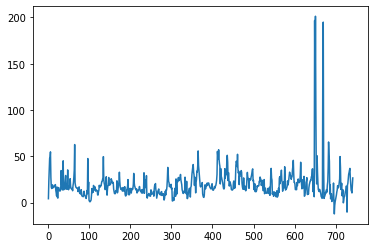

In [68]:
plt.plot(data["SystemLambda"])

In [69]:
def server_con(startdate, enddate):
    import pandas as pd
    import pyodbc
    print("DB CONNECT ATTEMPT")
    try:
        cs = ("DRIVER={ODBC Driver 17 for SQL Server};SERVER=10.201.102.6;DATABASE=GX_TR_SENA_STX_A_15;UID=read-GX_TR_SENA_STX_A_15;PWD=9kU2<td5C7:J?p/9;")
        cnxn = pyodbc.connect(cs)
        print ("SUCCESS")
    except Exception as e:
        print ("Error: " + str(e))
    StartDt = startdate
    EndDt = enddate
    table = 'ERCOT_NODAL_DAM_LMPS'
    datefield = 'OPR_DATE'
    additionalWhere = ""
    sql = """{call [GX_TR_SENA_STX_A_15].[dbo].[ZEMA_LNK_QRY](?,?,?,?,?)}"""
    values = (StartDt, EndDt, table, datefield, additionalWhere)
    cursor = cnxn.cursor()
    rows = cursor.execute(sql, (values)).fetchall()
    col_names = ['OPR_DATE', 'OPR_HOUR', 'BUS_NAME', 'LMP', 'DATE_INSERTED', 'DATE_UPDATED', 'DST_FLAG']
    df = pd.DataFrame([tuple(t) for t in rows])
    df.columns = col_names
    return df

In [70]:
server_con("2020-04-06", "2020-04-10")

DB CONNECT ATTEMPT
Error: ('01000', "[01000] [unixODBC][Driver Manager]Can't open lib 'ODBC Driver 17 for SQL Server' : file not found (0) (SQLDriverConnect)")


UnboundLocalError: local variable 'cnxn' referenced before assignment